# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Training Data

In [51]:
X= np.random.normal(size = 100)
w0,w1 = (3,4)

y = w0 + w1*X + np.random.normal(size = 100)

Text(0, 0.5, '$\\mathbf{Y}$')

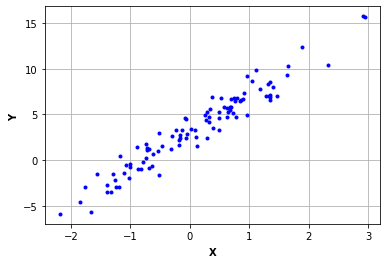

In [52]:
plt.plot(X,y,'.b')
plt.grid(True)
plt.xlabel("$\mathbf{X}$")
plt.ylabel("$\mathbf{Y}$")

## Adding dummy feature to the feature matrix

In [53]:
def add_dummy_feature(X):
    return np.column_stack((np.ones(X.shape[0]),X))

In [54]:
X_new = add_dummy_feature(X)

## Linear Regression Class

In [55]:
class LinearRegression():
    
    def predict(self,X:np.ndarray):
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray):
        return (1/2)*np.transpose((self.predict(X) - y))@(self.predict(X) - y)
    
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray):
        return X.T@(self.predict(X) - y)
    
    def change_weight_vector(self,lr,grad):
        self.w -= lr*grad
    
    def fit(self,X:np.ndarray,y:np.ndarray,lr,epochs):
        self.w = np.zeros(X.shape[-1])
        self.weights = []
        self.errors = []
        
        for _ in range(epochs):
            self.weights.append(self.w)
            loss = self.loss(X,y)
            self.errors.append(loss)
            dJdw = np.transpose(X)@(self.predict(X) - y)
            self.w -= lr*dJdw
            
        return self.w,self.errors,self.weights

In [56]:
linreg = LinearRegression()

In [57]:
weights,errors,weight_vector = linreg.fit(X_new,y,0.0001,1000)

In [58]:
weights

array([3.10241316, 3.96813521])

## Plotting the errors

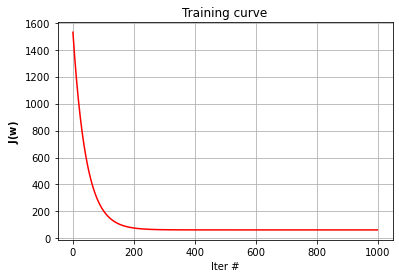

In [59]:
plt.plot(errors,'-r')
plt.title("Training curve")
plt.xlabel("Iter #")
plt.ylabel("$\mathbf{J(w)}$")
plt.grid(True)
plt.show()

## Plotting the prediction line

In [61]:
y_pred = linreg.predict(X_new)

Text(0, 0.5, '$\\mathbf{Y}$')

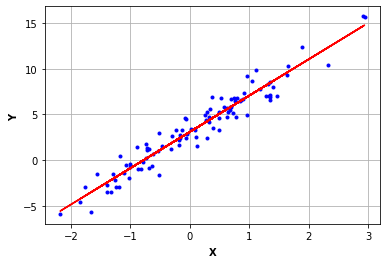

In [66]:
plt.plot(X,y,'.b')
plt.plot(X,y_pred,'-r')
plt.grid(True)
plt.xlabel("$\mathbf{X}$")
plt.ylabel("$\mathbf{Y}$")

# Polynomial Regression

## Feature transformation

In [5]:
import itertools
import functools
import numpy as np

In [6]:
def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)

def compute_new_features(items):
    return functools.reduce(lambda x,y:x*y,items)

In [7]:
x = np.array([[1,2],[5,4]])

In [8]:
for i in get_combinations(np.transpose(x),2):
    print(i,compute_new_features(i))

(array([1, 5]), array([1, 5])) [ 1 25]
(array([1, 5]), array([2, 4])) [ 2 20]
(array([2, 4]), array([2, 4])) [ 4 16]


In [9]:
def polynomial_transform(X,degree):
    X = np.array(X)
    X_t = np.transpose(X)
    
    features = [np.ones(len(X))]
    
    for i in range(1,degree+1):
        for j in get_combinations(X_t,i):
            feature = compute_new_features(j)
            
            features.append(feature)
    
    
    return np.transpose(features)

## Training data

In [127]:
X = np.random.normal(size = 100)

y = 3 + 4*X + 7*(X**2) + np.random.normal(size=100)

Text(0, 0.5, '$\\mathbf{Y}')

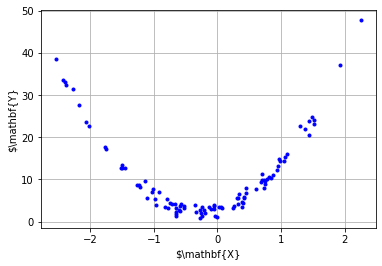

In [133]:
plt.grid(True)
plt.plot(X,y,'.b')
plt.xlabel("$\mathbf{X}")
plt.ylabel("$\mathbf{Y}")

In [136]:
X_poly = polynomial_transform(X,2)
X.shape,X_poly.shape

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


((100,), (5151,))

## We use linear regression as polynomial regression 

In [137]:
class LinearRegression():
    
    def predict(self,X:np.ndarray):
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray):
        return (1/2)*np.transpose((self.predict(X) - y))@(self.predict(X) - y)
    
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray):
        return X.T@(self.predict(X) - y)
    
    def change_weight_vector(self,lr,grad):
        self.w -= lr*grad
    
    def fit(self,X:np.ndarray,y:np.ndarray,lr,epochs):
        self.w = np.zeros(X.shape[-1])
        self.weights = []
        self.errors = []
        
        for _ in range(epochs):
            self.weights.append(self.w)
            loss = self.loss(X,y)
            self.errors.append(loss)
            dJdw = np.transpose(X)@(self.predict(X) - y)
            self.w -= lr*dJdw
            
        return self.w,self.errors,self.weights

In [138]:
poly_reg = LinearRegression()

In [141]:
poly_reg.fit(X_poly,y,0.001,100)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 5151)

# Least Square Classifier

## One hot encoding 

In [3]:
def one_hot_encode(labels):
    e = np.eye(len(np.unique(labels)))
    return e[labels]

In [4]:
y = np.array([0,1,0,2])
one_hot_encode(y)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [20]:
class LeastSquareClassifier():
    def predict(self,X:np.ndarray):
        return np.argmax(X@self.w,axis = 1)
    
    def _predict_internal(self,X:np.ndarray):
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray):
        return (1/2)*np.transpose(self._predict_internal(X) - y)@(self._predict_internal(X) - y)
    
    def fit(self,X:np.ndarray,y:np.ndarray):
        self.w = np.linalg.pinv(X)@y
        
        return self.w

In [21]:
lsc = LeastSquareClassifier()
X = np.array([[1,-3,2,-5],[1,9,-4,7]])
w = np.array([1,1,1,1])
y = np.array([1,0])

In [22]:
w_new = lsc.fit(X,y)

In [23]:
lsc.loss(X,y)

1.2094840050751841e-30

## confusion Matrix

In [24]:
def confusion_matrix(y,y_hat):
    TN = np.where((y == 0) and (y_hat == 0),1,0).sum()
    TP = np.where((y == 1) and (y_hat == 1),1,0).sum()
    FN = np.where((y == 1) and (y_hat == 0),1,0).sum()
    FP = np.where((y == 0) and (y_hat == 1),1,0).sum()
    
    return np.array([
        [TP,FP],[FN,TN]
    ])

# Perceptron

In [ ]:
class Perceptron():
    def predict(self,X:np.ndarray):
        z =  X@self.w
        return np.where(z>=0,1,-1)
    
    
    def loss(self,X:np.ndarray,y:np.ndarray):
        z = -1*np.transpose(self.w)@(self.predict(X)@y)
        return np.maximum(np.zeros(z.shape[0]),z)
    
    def fit(self,X:np.ndarray,y:np.ndarray,epochs:int):
        self.w = np.zeros(X.shape[-1])
        self.weights = []
        self.errors = []
        for i in range(epochs):
            self.weights.append(self.w)
            error = 0
            for x,y in zip(X,y):
                error = self.loss(x,y)
                self.errors.append(error)
                self.w -= 
    

# Logistic Regression

In [224]:
def create_dataset():
    x0 = np.random.normal(size=50).reshape(-1,2) - 1
    x1 = np.random.normal(size = 50).reshape(-1,2) + 1
    return np.concatenate([x0,x1]), np.concatenate([np.zeros(25),np.ones(25)])

In [225]:
X,y = create_dataset()

In [226]:
X.shape,y.shape

((50, 2), (50,))

In [227]:
X = np.column_stack((np.ones(X.shape[0]),X))

In [228]:
X.shape,y.shape

((50, 3), (50,))

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [230]:
X_train.shape,y_train.shape

((40, 3), (40,))

In [261]:
class LogisticRegression():
    def _sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def _linear_combination(self,X:np.ndarray):
        return X@self.w
    
    def predict(self,X:np.ndarray,threshold=0.5):
        lc = self._linear_combination(X)
        y_hat = self._sigmoid(lc)
        return np.where(y_hat>=threshold,1,0)
    
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate):
        lc = self._linear_combination(X)
        y_hat = self._sigmoid(lc)
        e1 = y@np.log(y_hat)
        e2 = (1-y)@np.log(1 - y_hat)
        reg_err = (reg_rate/2)*(np.transpose(self.w)@self.w)
        return -1*(e1+e2)
    
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray):
        lc = self._linear_combination(X)
        y_hat = self._sigmoid(lc)
        return np.transpose(X)@(y_hat - y)
    
    def update_weight_vector(self,lr,grad):
        self.w -= lr*grad
        return self.w
    
    def graident_descent(self,X:np.ndarray,y:np.ndarray,epoch:int,lr:float,reg_rate):
        self.w = np.zeros(X.shape[-1])
        self.errors = []
        self.weights = []
        
        for _ in range(epoch):
            self.errors.append(self.loss(X,y,reg_rate))
            dJdw = self.calculate_gradient(X,y)
            self.w = self.update_weight_vector(lr,dJdw)
            self.weights.append(self.w)
            
        return self.weights,self.errors
            
        
        

In [262]:
log_reg = LogisticRegression()

In [263]:
weights,errors = log_reg.graident_descent(X_train,y_train,100,0.01,0.001)

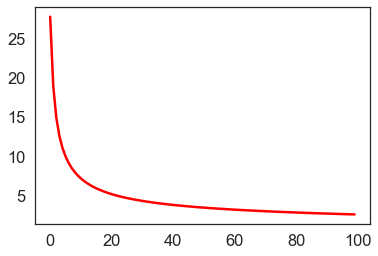

In [264]:
plt.plot(errors,'-r')

In [277]:
y_pred = log_reg.predict(X_test)

# Bernoulli Naive Bayes

`### $$y = argmax_{y}Xlogw^{T} + (1-X)log(1- w^{T}) + log w_{prior}$$

In [334]:
class BernoulliNB():
    def fit(self,X:np.ndarray,y:np.ndarray):
        n_samples,n_features = X.shape
        n_classes,class_counts = np.unique(y,return_counts=True)
        
        self.priors = class_counts/np.sum(class_counts)
        self.w = np.zeros((len(n_classes),n_features),dtype = np.float64)
        
        for c in n_classes:
            X_c = X[y == c]
            
            self.w[c,:] = (np.sum(X_c,axis = 0) + 1)/(X_c.shape[0] +2)

            
        return self.priors,self.w
    
    def _log_likelihood(self,X:np.ndarray):
        return X@np.log(np.transpose(self.w)) + (1 - X)@np.log(1 - np.transpose(self.w)) + np.log(self.priors)
    
    def predict(self,X:np.ndarray):
        return np.argmax(self._log_likelihood(X),axis = 1)

In [335]:
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])

In [336]:
bnb = BernoulliNB()
priors,weights = bnb.fit(X,y)

In [337]:
priors

array([0.5, 0.5])

In [338]:
weights

array([[0.25, 0.75],
       [0.75, 0.25]])

In [339]:
bnb.predict(X)

array([1, 0, 0, 1], dtype=int64)

# Gaussian NB

In [341]:
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100,n_features=2,centers=[[5,5],[10,10]],cluster_std=1.5,random_state=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=133)

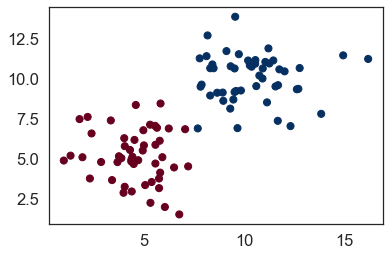

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c = y,s = 50,cmap="RdBu")

xlim = (min(X[:,0])-2,max(X[:,0]+2))
ylim = (min(X[:,1])-2,max(X[:,1]+2))

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(ylim[0],ylim[1],60)
xx,yy = np.meshgrid(xg,yg)
Xgrid = np.vstack([xx.ravel(),yy.ravel()])

for label,color in enumerate(['red','blue']):
    mask = (y == label)

In [371]:
class GaussainNB():
    def fit(self,X:np.ndarray,y:np.ndarray):
        n_samples,n_features = X.shape
        self.n_classes,class_counts = np.unique(y,return_counts=True)
        self.priors = class_counts/np.sum(class_counts)
        self.w = np.zeros((len(self.n_classes),n_features))
        self.means = np.zeros((len(self.n_classes),n_features))
        self.vars = np.zeros((len(self.n_classes),n_features))
        for i in self.n_classes:
            X_c = X[y==i]
            self.w[i,:] = np.sum(X_c,axis = 0)/class_counts[i]
            self.means[i,:] = np.mean(X_c,axis=0)
            self.vars[i,:] = np.var(X_c,axis=0)
            
        return self.means,self.vars,self.priors
    
    def _logofmormal(self,X,mean,var):
        out = -0.5*(np.log(2*np.pi)) + np.log(var)
        exp = -0.5*(X - mean)**2/var
        return np.sum(out+exp,axis = 1)
    
    def predict(self,X:np.ndarray):
        n_samples,n_featues = X.shape
        posterior = np.zeros((n_samples,len(self.n_classes)))
        for c in self.n_classes:
            posterior[:,c] = np.log(self.priors[c]) + self._logofmormal(X,self.means[c,:],self.vars[c,:]) 
            
        return np.argmax(posterior,axis = 1)

In [372]:
gaussian_nb = GaussainNB()
gaussian_nb.fit(X_train,y_train)

(array([[ 4.66641536,  5.10890637],
        [10.02663851, 10.05539582]]),
 array([[2.33005865, 2.8282074 ],
        [2.45169981, 2.05961415]]),
 array([0.525, 0.475]))

In [373]:
gaussian_nb.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [374]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

# Softmax Regression

## Training data

In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

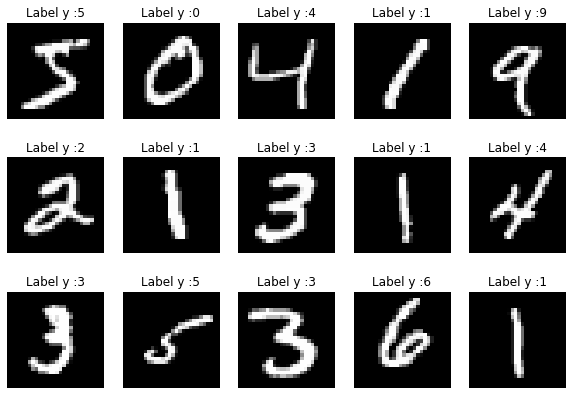

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(X_train[i],cmap = 'gray')
    ax.set_title(f'Label y :{y_train[i]}')
    plt.axis('off')
              

In [4]:
X_train = X_train.reshape(-1,784)/255
X_test = X_test.reshape(-1,784)/255

In [10]:
class SoftmaxRegression():
    def predict(self,X:np.ndarray):
        return X@self.w + self.b
    def _one_hot_encode(self,y):
        '''
        One-hot encoding the label vector 
        '''
        e = np.eye(len(np.unique(y)))
        y_one_hot = e[y]
        
        return y_one_hot
    
    def _softmax(self,z):
        exp = np.exp(z - np.max(z))
        return exp/np.sum(exp,axis=0)
    
    def loss(self,X:np.ndarray,y:np.ndarray):
        y_hat = self._softmax(X)
        
        
        print(y_hat.shape)
        
#         return np.sum(y*np.log(y_hat),axis = 0)
    
    

In [11]:
sfr  = SoftmaxRegression()

In [12]:
y_train_hot = sfr._one_hot_encode(y_train)

In [13]:
X_try = sfr._softmax(X_train)

In [14]:
sfr.loss(X_train,y_train)

(60000, 784)


In [397]:
y = np.array([8,6,3])


# K-Nearest Neighbours

In [ ]:
class KNearestNeighbours():
    def __init__(self,)

# $$PRACTICE-QUESTIONS$$

Write a function named vec_addition(u,v) which takes two vectors u and v as input and returns their vector addition.
 
  1. Inputs: u and v are two numerical numpy arrays. 
  2. Output: a vector representing sum of u and v, if they have consistent shapes, None otherwise.

In [1]:
def vec_addition(u,v):
    assert u.shape == v.shape,None
    
    return u+v

write a function named scalar_multiply(u,k) which takes a vector u and a scalar k as input and returns k times u as output
 
  1. Inputs: A vector u and a scalar k
  2. Output: Returns a vector which is k times u


In [2]:
def scalar_multiply(u,k):
    return k*u

Write a function hadamard(u,v) which takes two vectors u and v as input and returns hadamard product of u and v.
Hdamard product is obtained via multiplying two matrices/vectors elementwise.
 
  1. Inputs: Two vectors u and v
  2. Output: Hadamard product of u and v if the dimensions of u and v are consistent, otherwise None

In [4]:
import numpy as np
def hadamard(u,v):
    assert u.shape == v.shape,None
    
    return u*v
u = np.array([[3,5,7],[4,9,8]])
v = np.array([[1,6,3],[0,2,9],[1,1,1]])
hadamard(u,v)

AssertionError: None

In [2]:
import numpy as np
def softmax(z):
    exp = np.exp(z - np.max(z))
    
    return exp/np.sum(exp,axis=0)

In [3]:
z = np.array([[1],[0],[-1],[3]])
softmax(z)

array([[0.11245721],
       [0.0413707 ],
       [0.01521943],
       [0.83095266]])